In [114]:
# Chapter 3 - Linear regression

In [146]:
import numpy as np
import pandas as pd
import scipy as sp
import IPython as ipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')

### 8. This question involves the use of simple linear regression on the Auto data set.  
(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor.   Use the summary() function to print the results. Comment on the output.  
For example:  
i. Is there a relationship between the predictor and the response?  
ii. How strong is the relationship between the predictor and the response?  
iii. Is the relationship between the predictor and the response positive or negative?  
iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?  

In [116]:
auto = pd.read_csv('./Datasets/Auto.csv', index_col=0)

In [117]:
simple_model = smf.ols('mpg ~ horsepower', auto).fit()

In [118]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           7.03e-81
Time:                        16:22:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. There is relationship between horsepower and mpg  
2. This relationship is relatively weak, but according to p-value, it is significant  
3. Relationship is negative  



In [119]:
def response_confidence_interval(model, y_predicted, alpha=.05):
    t = sp.stats.t.ppf(1-alpha/2, model.nobs-1)
    se = np.sqrt(model.mse_resid)
    
    return (y_predicted - t * se, y_predicted + t * se)

In [120]:
def predictive_interval(y_predicted, y_training, alpha=.05):

    n_obs = len(y_training)
    t = sp.stats.t.ppf(1-alpha/2, n_obs-1)
    y_mean = np.mean(y_training)
    y_var = np.var(y_training)
    
    return (y_mean - t * y_var * np.sqrt(1+1/n_obs), y_mean + t * y_var * np.sqrt(1+1/n_obs))

In [121]:
y_predicted = simple_model.predict(pd.DataFrame({'horsepower':[98]}))[0]
print('Predicted mpg for horsepower=98 is {}'.format(y_predicted))
print('Associated confidence interval is ({}, {})'.format(*response_confidence_interval(simple_model, y_predicted)))
print('Predictive interval for mpg given horsepower={} is ({}, {})'.format(98, *predictive_interval(y_predicted, auto['mpg'])))

Predicted mpg for horsepower=98 is 24.467077152512438
Associated confidence interval is (14.82211533423847, 34.11203897078641)
Predictive interval for mpg given horsepower=98 is (-96.16892272177728, 143.06075945647117)


(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.  

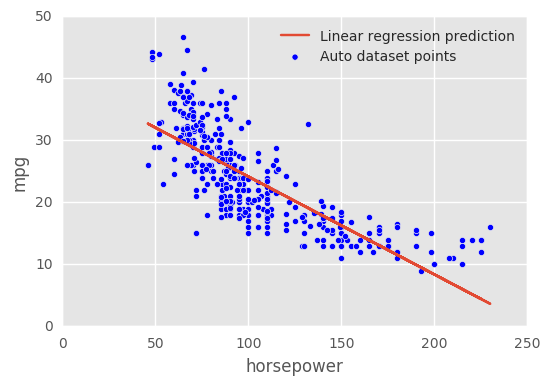

In [122]:
plt.scatter(auto['horsepower'], auto['mpg'], label='Auto dataset points')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.plot(auto['horsepower'], simple_model.predict(), label='Linear regression prediction')
plt.legend(loc='best')
plt.show()

(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.  

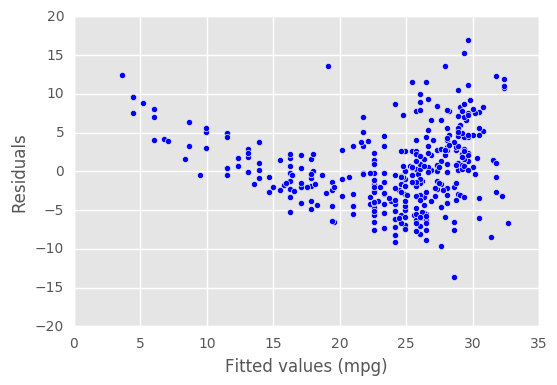

In [123]:
plt.scatter(simple_model.fittedvalues, simple_model.resid)
plt.xlabel('Fitted values (mpg)')
plt.ylabel('Residuals')
plt.show()

We can see heteroskedasticity.

### 9. This question involves the use of multiple linear regression on the Auto data set.  
(a) Produce a scatterplot matrix which includes all of the variables in the data set.  

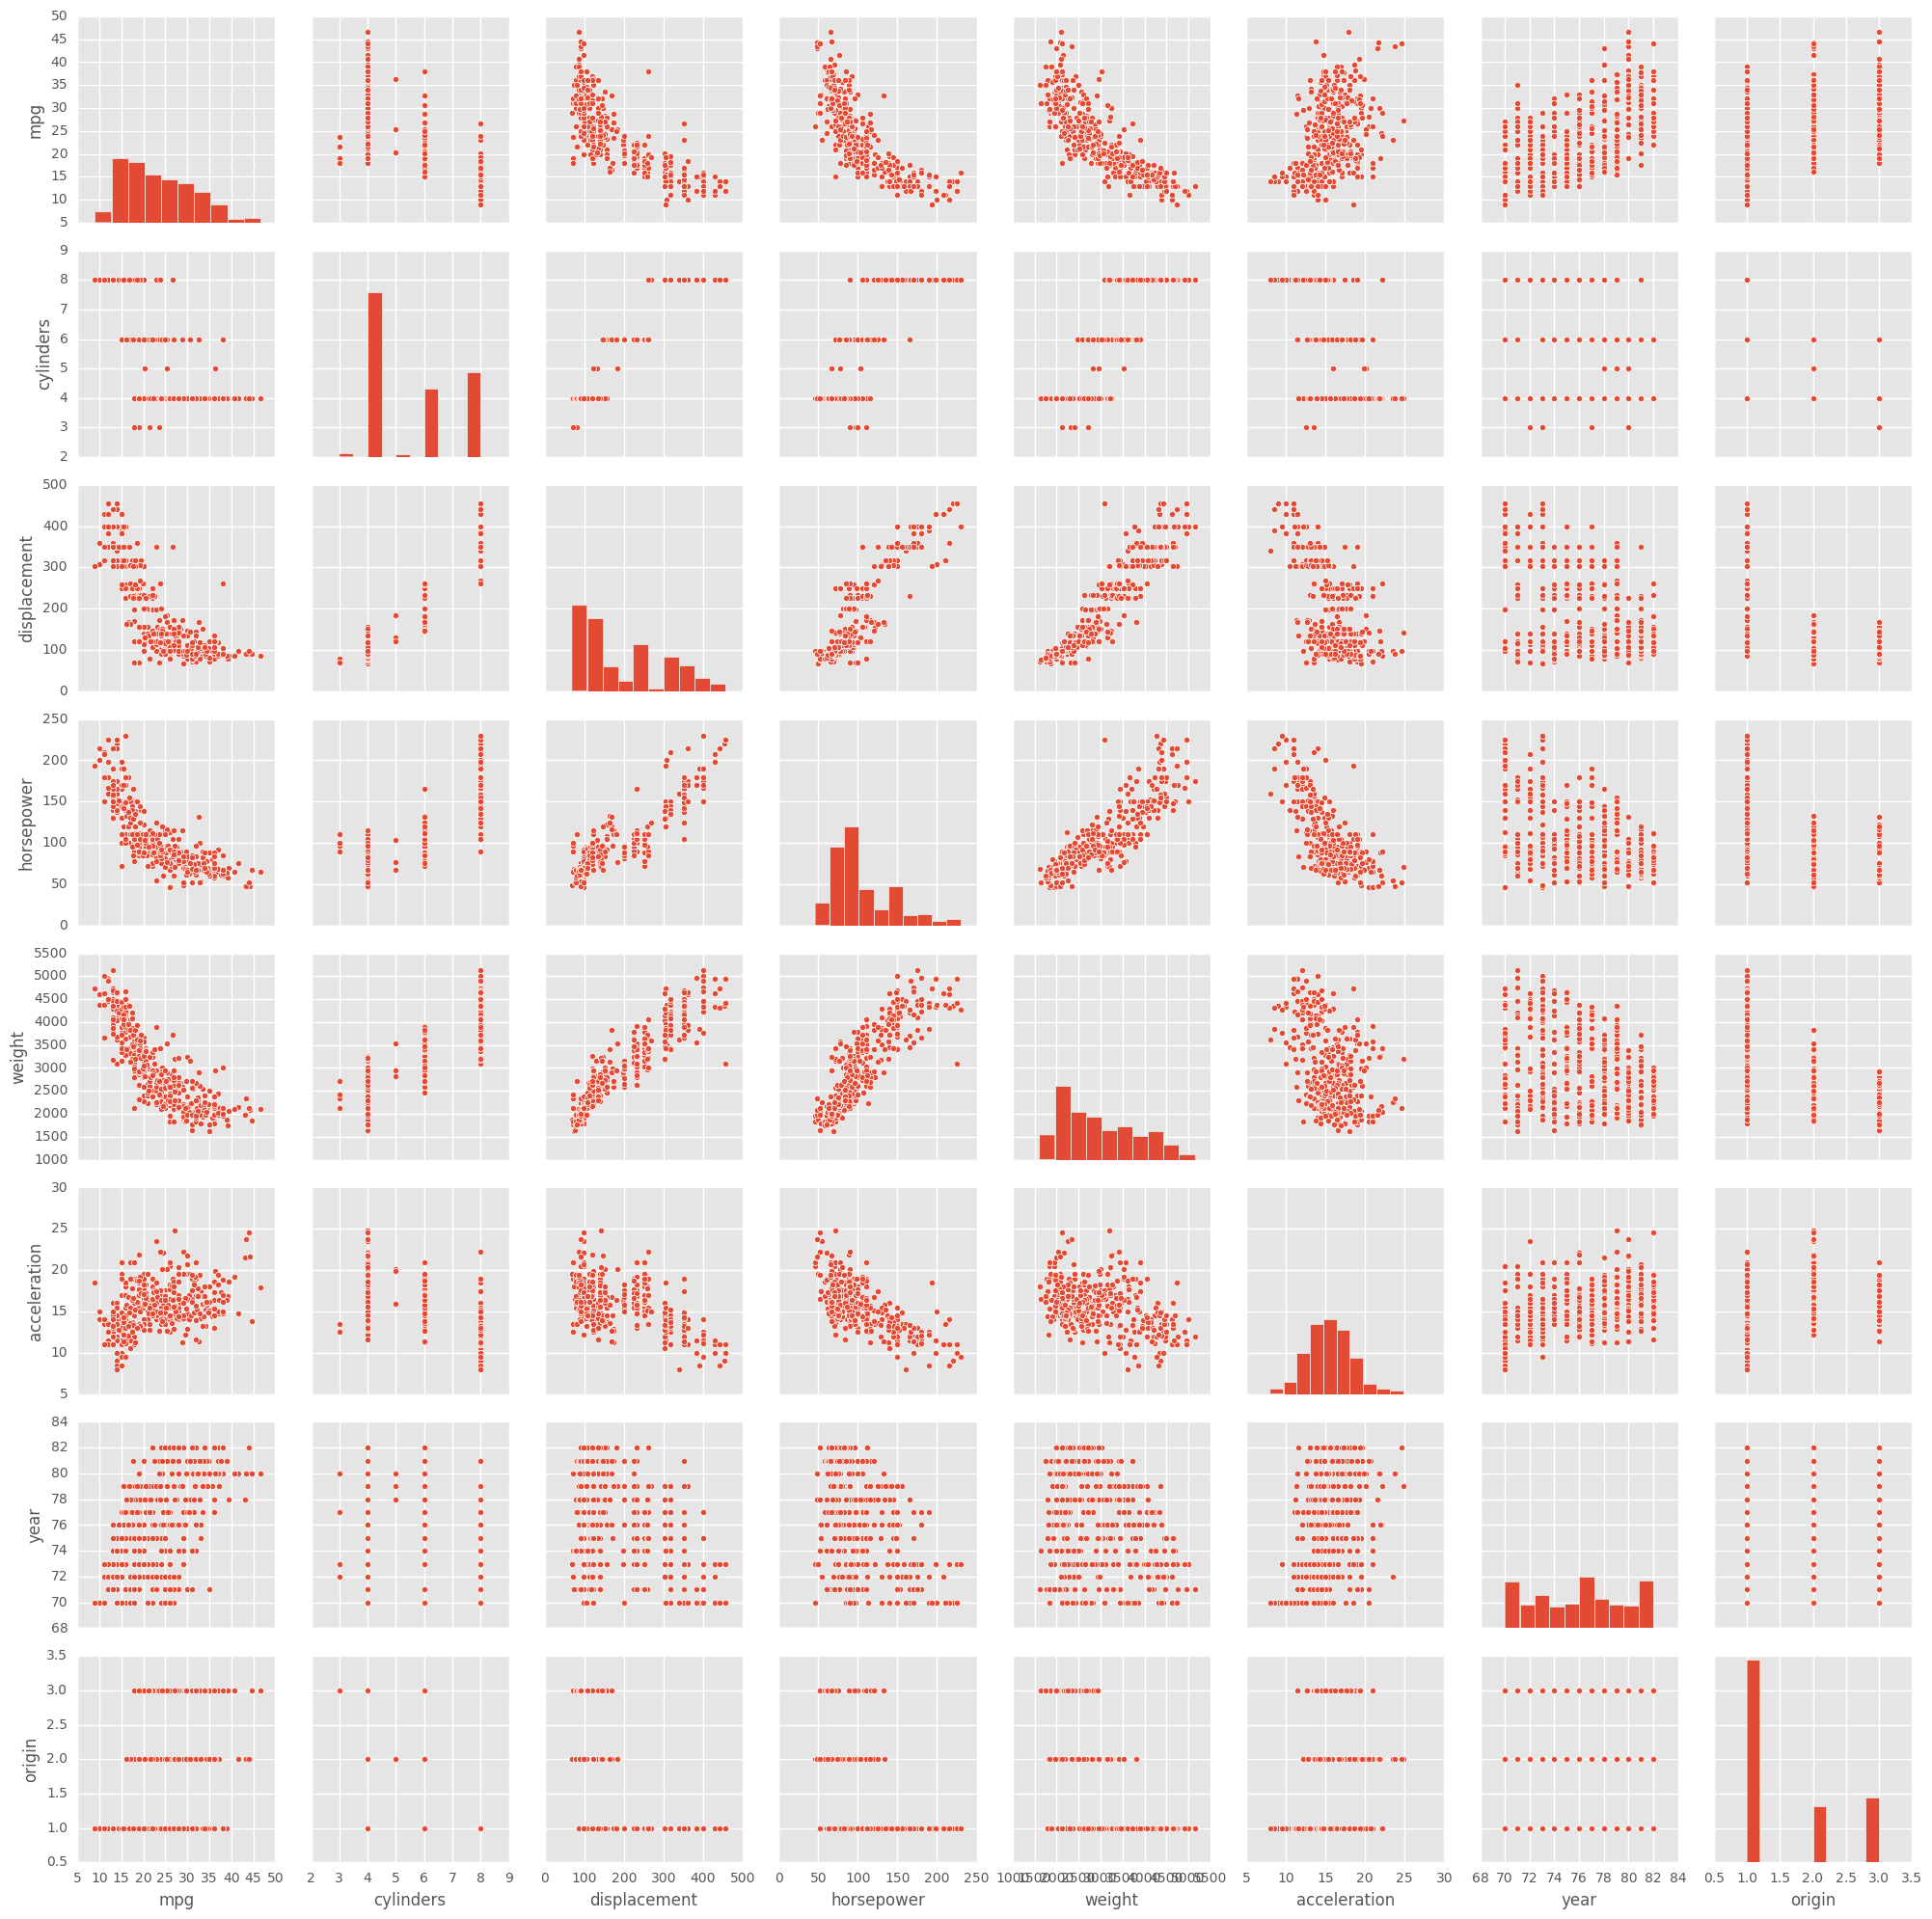

In [124]:
sns.pairplot(auto)

(b) Compute the matrix of correlations between the variables using the function cor() . You will need to exclude the name variable, which is qualitative.  

In [125]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the response?  
ii. Which predictors appear to have a statistically significant relationship to the response?  
iii. What does the coefficient for the year variable suggest?  

In [126]:
mult_model = smf.ols('mpg~' + '+'.join(auto.columns.difference(['mpg', 'name']) ), data=auto).fit()

In [127]:
mult_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 02 Nov 2016   Prob (F-statistic):          2.04e-139
Time:                        16:22:19   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000       -26.350    -8.087
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
origin           1.4261      0.278      5.127      0.000         0.879     1.973
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
year             0.7508      0.051     14.729      0.000         0.651     0.851
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. There is a relationship between predictors and response  
2. displacement, origin, weight and year coefficients are statistically significant  
3. All equal, car models that presented in one year from now will have mpg higher by 0.75 than models, presented in this year.  

(d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?  

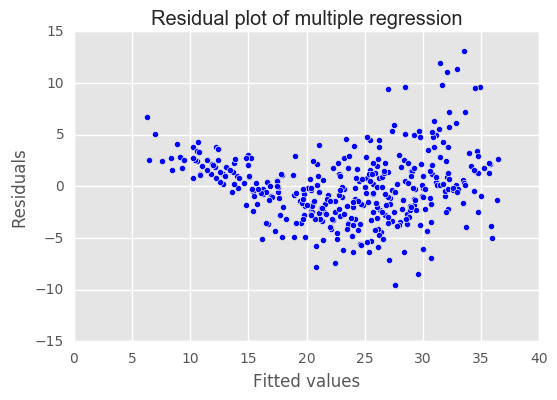

In [128]:
plt.scatter(mult_model.fittedvalues, mult_model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot of multiple regression')
plt.show()

As we can see, there is heteroskedasticity in resuduals.

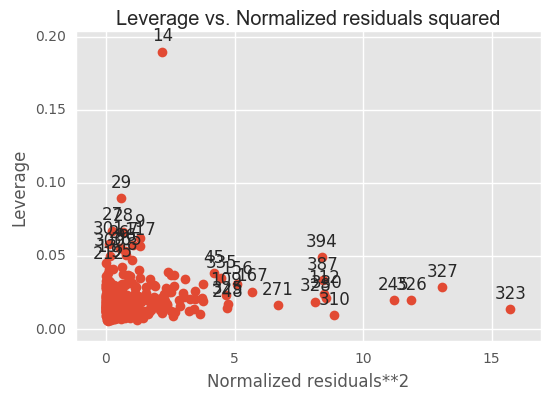

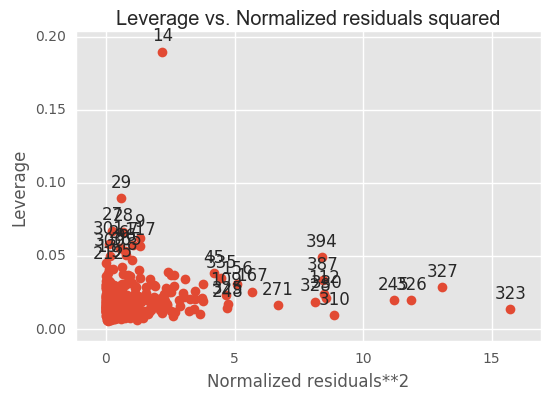

In [129]:
_ = sm.graphics.plot_leverage_resid2(mult_model)

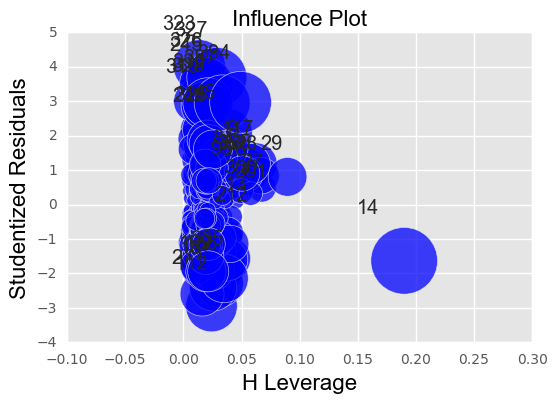

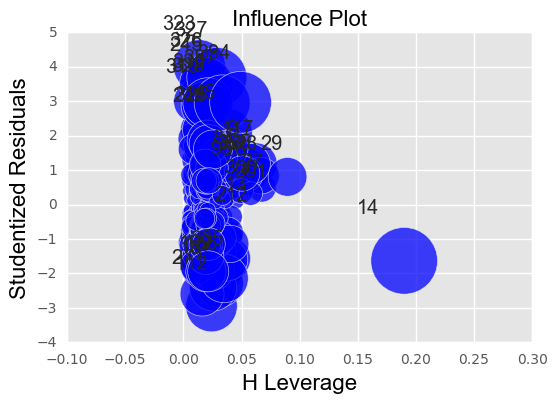

In [130]:
_ = sm.graphics.influence_plot(mult_model)

We can see that observation number 14 has unusual predictor values.

In [131]:
auto.iloc[14, :]

mpg                                24
cylinders                           4
displacement                      113
horsepower                         95
weight                           2372
acceleration                       15
year                               70
origin                              3
name            toyota corona mark ii
Name: 15, dtype: object

(e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [132]:
mult_model_int = smf.ols('mpg~' + '+'.join(auto.columns.difference(['mpg', 'name']) ) + '+ cylinders : horsepower', data=auto).fit()
mult_model_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     299.3
Date:                Wed, 02 Nov 2016   Prob (F-statistic):          1.33e-159
Time:                        16:22:21   Log-Likelihood:                -972.89
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               11.7025      4.912      2.383      0.018         2.046    21.360
acceleration            -0.1703      0.090     -1.889      0.060        -0.348     0.007
cylinders               -4.3061      0.458     -9.400      0.000        -5.207    -3.405
displacement            -0.0014      0.007     -0.201      0.840        -0.015     0.012
horsepower              -0.3157      0.031    -10.304      0.000        -0.376    -0.255
origin                   0.9032      0.250      3.617      0.000         0.412     1.394
weight                  -0.0039      0.001     -6.250      0.000        -0.005    -0.003
year                     0.7393      0.045     16.476      0.000         0.651     0.828
cylinders:horsepower     0.0402      0.004     10.619      0.000         0.033     0.048
==============================================================================
Omnibus:                       42.400   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.790
Skew:                           0.635   Prob(JB):                     7.78e-18
Kurtosis:                       4.792   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interaction between number of cylinders and horsepower is significant.

(f) Try a few different transformations of the variables, such as $log(X), sqrt(X), X^2$ . Comment on your findings.

In [133]:
mult_model_tr = smf.ols('mpg~' + '+'.join(auto.columns.difference(['mpg', 'name']) ) + '+ np.sqrt(horsepower) + np.sqrt(weight)', data=auto).fit()
mult_model_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     270.7
Date:                Wed, 02 Nov 2016   Prob (F-statistic):          8.63e-160
Time:                        16:22:21   Log-Likelihood:                -969.48
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     382   BIC:                             1999.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              66.4690      9.317      7.134      0.000        48.150    84.788
acceleration           -0.2126      0.100     -2.120      0.035        -0.410    -0.015
cylinders              -0.0980      0.290     -0.338      0.736        -0.669     0.473
displacement           -0.0007      0.007     -0.098      0.922        -0.015     0.013
horsepower              0.2745      0.059      4.677      0.000         0.159     0.390
origin                  0.7085      0.254      2.794      0.005         0.210     1.207
weight                  0.0106      0.004      2.938      0.004         0.004     0.018
year                    0.7690      0.045     17.026      0.000         0.680     0.858
np.sqrt(horsepower)    -7.0168      1.356     -5.176      0.000        -9.682    -4.351
np.sqrt(weight)        -1.6353      0.419     -3.907      0.000        -2.458    -0.812
==============================================================================
Omnibus:                       36.614   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.753
Skew:                           0.538   Prob(JB):                     2.62e-16
Kurtosis:                       4.798   Cond. No.                     1.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Square roots of horsepower and weight predictors are significant, because they capture nonlinear relationship with responce variable.  

### 10. This question should be answered using the Carseats data set.  
(a) Fit a multiple regression model to predict Sales using Price, Urban , and US.  

In [134]:
carseats = pd.read_csv('./Datasets/carseats.csv', index_col=0)
carseats['Urban'] = carseats['Urban'].map({'Yes':1, 'No':0})
carseats['US'] = carseats['US'].map({'Yes':1, 'No':0})
carseats['ShelveLoc'] = carseats['ShelveLoc'].map({'Bad':0, 'Medium':1, 'Good':2})

In [135]:
mult_model = smf.ols('Sales ~ Price + Urban + US', carseats).fit()

In [136]:
mult_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           2.39e-23
Time:                        16:22:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000        11.764    14.323
Price         -0.0545      0.005    -10.389      0.000        -0.065    -0.044
Urban         -0.0219      0.272     -0.081      0.936        -0.556     0.512
US             1.2006      0.259      4.635      0.000         0.691     1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

All else equal:  
Price increase by $1 decrease sales by 0.06 units  
Sales in US are 1 unit higher  
Sales in urban area is 0.02 lower than in rural area  

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$$
Sales = 
\left\{ \begin{matrix}13.0435 - 0.0545 \times Price, if \ rural \ and \ not \ US
\\13.0216 - 0.0545 \times Price, if \ urban \ and \ not \ US
\\14.2441 - 0.0545 \times Price, if \ rural \ and \ US
\\14.2222 - 0.0545 \times Price, if \ urban \ and \ US
\end{matrix}\right.
$$




d) For which of the predictors can you reject the null hypothesis $H_0 : β_j = 0$?

For price and US

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.  

In [137]:
mult_model_s = smf.ols('Sales ~ Price + US', carseats).fit()
mult_model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           2.66e-24
Time:                        16:22:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000        11.790    14.271
Price         -0.0545      0.005    -10.416      0.000        -0.065    -0.044
US             1.1996      0.258      4.641      0.000         0.692     1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

Both models fit the data almost the same

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).  (In table)

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

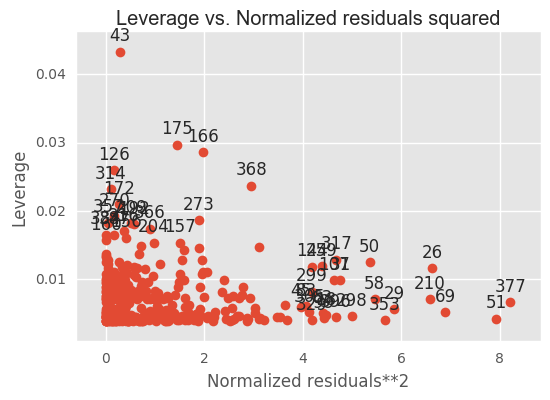

In [140]:
_ = sm.graphics.plot_leverage_resid2(mult_model_s)

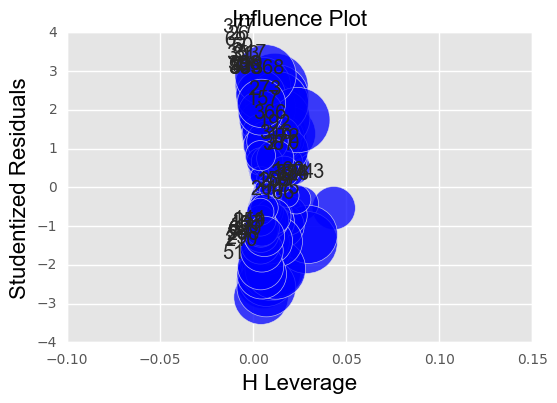

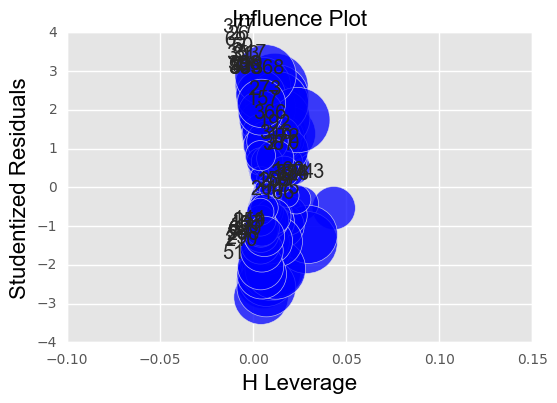

In [139]:
_ = sm.graphics.influence_plot(mult_model_s)

There is no oultier points. Observation with number 43 has high leverage (unusual regressor values).

### 11. In this problem we will investigate the t-statistic for the null hypothesis $H_0 : β = 0$ in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.
> set.seed(1)  
> x=rnorm(100)  
> y=2*x+rnorm(100)  

In [141]:
np.random.seed(1)
x = np.random.normal(size=(100,))
y = 2 * x + np.random.normal(size=(100,))

(a) Perform a simple linear regression of $y$ onto $x$ , without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : β = 0$. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0) .)

In [151]:
model = smf.OLS(y, x, hasconst=False).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           3.46e-36
Time:                        16:58:20   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000         1.896     2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\hat{\beta} = 2.1067\\
se(\hat{\beta}) = 0.106\\
t = 19.792\\
p-value = 0
$$
$\hat{\beta}$ is significant. Increase in $x$ by 1 increases responce py 2.1067.

(b) Now perform a simple linear regression of $x$ onto $y$ without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : β = 0$. Comment on these results.

In [143]:
model_2 = smf.OLS(x, y, hasconst=False).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           3.46e-36
Time:                        16:40:43   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000         0.341     0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\hat{\beta} = 0.3789\\
se(\hat{\beta}) = 0.019\\
t = 19.792\\
p-value = 0
$$
$\hat{\beta}$ is significant. Increase in $y$ by 1 increases response py 0.3789.

(c) What is the relationship between the results obtained in (a) and(b)?  
- (b) is an inverse function of (a)

(d) For the regression of Y onto X without an intercept, the t-statistic for $H_0 : β = 0$ takes the form
$\hat{\beta} / SE(\hat{\beta})$, where
$\hat{\beta}$ is
given by (3.38), and where


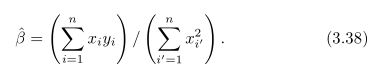

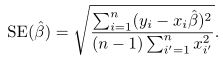

In [149]:
ipy.display.display(ipy.display.Image('ch2_b_hat.jpg'))
ipy.display.display(ipy.display.Image('ch2_se.jpg'))

(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R , that the t-statistic can be written as

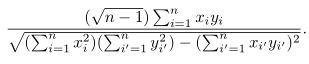

In [150]:
ipy.display.display(ipy.display.Image('ch2_show.jpg'))

In [155]:
# t = beta/SE(beta)
model.params[0] / model.bse[0]

19.791801987091201

In [158]:
# calculating t with expanded beta and se(beta)
beta = np.sum(x * y) / np.sum(x ** 2)
se = np.sqrt(np.sum((y - beta * x) ** 2)/((model.nobs - 1) * np.sum(x ** 2)))
beta / se

19.791801987091201

In [160]:
# calculating t with rewritten formula
(np.sqrt(model.nobs - 1) * np.sum(x*y)) / np.sqrt(np.sum(x ** 2) * np.sum(y ** 2) - np.sum (x*y) **2)

19.791801987091205

e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y .  
We could claim that t-statistics for both regressions are the same, because we have same data for both models and the only difference is that we change roles of y and x. This is irrelevant for calculation as we can see in last equation.  

(f) In R , show that when regression is performed with an intercept, the t-statistic for $H_0 : β_1 = 0$ is the same for the regression of $y$ onto $x$ as it is for the regression of $x$ onto $y$ 

In [162]:
smf.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           3.46e-36
Time:                        17:14:57   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000         0.341     0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
smf.OLS(x, y).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           3.46e-36
Time:                        17:15:19   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000         0.341     0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""